# Projeto Final PANDA 

### Universidade Federal de São Carlos
### Aluno : Yago David Pimenta    RA : 800273

#### 1 etapa - Importar as bibliotecas

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans


#### 2 etapa - Selecionar o dataset e descrevê-lo

In [2]:
df = pd.read_csv("/home/yago/Desktop/4Periodo/materias/Panda/br_tse_eleicoes_2018_2022.csv")

/tmp/ipykernel_8478/1057558914.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/yago/Desktop/4Periodo/materias/Panda/br_tse_eleicoes_2018_2022.csv")


In [4]:
df.head(5)

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
0,2018,eleicao ordinaria,DF,NaN,NaN,105.0,1333015160,87699770400,70000612418,18007,...,1985-05-01,33.0,feminino,ensino superior completo,divorciado(a),brasileira,RS,Porto Alegre,lizianebrauner@hotmailcom,branca
1,2018,eleicao ordinaria,RR,NaN,NaN,270.0,32293593215,3011792682,230000605201,54300,...,1970-06-13,48.0,masculino,ensino medio completo,casado(a),brasileira,PI,Inhuma,elivaldocruzrr@hotmailcom,parda
2,2018,eleicao ordinaria,RR,NaN,NaN,537.0,32307209204,2718862631,230000615943,1888,...,1973-03-04,46.0,masculino,ensino superior completo,casado(a),brasileira,PA,Belém,cirororaima@yahoocombr,parda
3,2018,eleicao ordinaria,PR,NaN,NaN,713.0,32315457904,15458640647,160000629332,27115,...,1957-04-01,62.0,feminino,ensino medio completo,casado(a),brasileira,PR,Colombo,olescoveaup2016@gmailcom,branca
4,2018,eleicao ordinaria,RR,NaN,NaN,753.0,32317760230,1159942615,230000605200,54444,...,1971-02-12,48.0,masculino,ensino fundamental completo,solteiro(a),brasileira,RR,Boa Vista,girdenitorreias65@outlookcom,parda


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614352 entries, 0 to 614351
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ano                   614352 non-null  int64  
 1   tipo_eleicao          614352 non-null  object 
 2   sigla_uf              614301 non-null  object 
 3   id_municipio          556407 non-null  float64
 4   id_municipio_tse      556407 non-null  float64
 5   id_candidato_bd       613644 non-null  float64
 6   cpf                   614352 non-null  object 
 7   titulo_eleitoral      614352 non-null  int64  
 8   sequencial            614352 non-null  int64  
 9   numero                614352 non-null  int64  
 10  nome                  614352 non-null  object 
 11  nome_urna             614352 non-null  object 
 12  numero_partido        614352 non-null  int64  
 13  sigla_partido         614352 non-null  object 
 14  cargo                 614352 non-null  object 
 15  

In [6]:
df.columns

Index(['ano', 'tipo_eleicao', 'sigla_uf', 'id_municipio', 'id_municipio_tse',
       'id_candidato_bd', 'cpf', 'titulo_eleitoral', 'sequencial', 'numero',
       'nome', 'nome_urna', 'numero_partido', 'sigla_partido', 'cargo',
       'situacao', 'ocupacao', 'data_nascimento', 'idade', 'genero',
       'instrucao', 'estado_civil', 'nacionalidade', 'sigla_uf_nascimento',
       'municipio_nascimento', 'email', 'raca'],
      dtype='object')

Vamos entender melhor os atributos e tuplas :

. **ano** : ano da eleição

. **tipo_eleicao** : tipo dela

. **sigla_uf** : sigla da unidade federativa , por exemplo MG = Minas Gerais

.**id_municipio** : id do municipio em que a pessoa nasceu

.**id_municipio_tse** : id daonde a pessoa vota

.**id_candidato_bd** : é uma chave que representa unicamente uma pesosa

.**cpf** : cpf da pessoa , também pode ser considerada uma chave

.**titulo_eleitoral** : número que consta no título de eleitor

.**sequencial** : não sei

.**número** : não sei

.**nome** : nome completo do(a) candidato(a)

.**nome_urna** : como seu nome está cadastrado na urna

**numero_partido** :  número do partido

**sigla_partido** : sigla do partido 

**cargo** : cargo concorrido pelo candidato

**situação** : se a candidatura foi deferida ou indeferida

**ocupação** : qual a profissão que o candidato exerce naquele momento

**data_nascimento** : quando o candidato nasceu

**idade** : quantos anos ele tem

**genero** : apenas masculino ou feminino

**intrução** : se ele tem ensino superior completo , ou médio ou fundamental .

**estado_civil** : se ele é casado , divorciado , solteiro .

**nacionaliadade** : se é brasileiro

**sigla_uf_nascimento** : de qual estado ele é

**municipio_nascimento** : cidade em que o candidato nasceu

**email** : email

**raca** : autodeclaração de raça





=========================================================================

São muitos atributos que deixam espaço para fazer muitas análises e hipóteses , porém como existe limite de tempo irei focar em 3 que possam abordar todos os conteúdos vistos na matéria , envolvendo pré-processamento , mineração de dados , visualização dos dados , análise estatistica .

### 3 etapa - Hipóteses para eu abordar com minha análise dos dados

#### 1 -Está ocorrendo uma inversão nas candidatos , existem mais homens com mais de 40 anos candidatos do que mulheres nessa idade , porém existem mais mulheres com menos de 40 anos candidatas do que homens nessa idade

Primeiro paaso : Preciso ver se tem algum valor faltante e  quantas opções existe de gênero , haja vista que Feminino é diferente de feminino , por exemplo .

In [7]:
df['genero'].isnull().values.any()

True

In [8]:
df['genero'].value_counts()

masculino    408708
feminino     205619
Name: genero, dtype: int64

Ou seja é uma relação binária e está faltando valores .

In [9]:
df.loc[df['idade'] <= 40, 'Hipótese1'] = 'Menos40' 
df.loc[df['idade'] > 40, 'Hipótese1'] = 'Mais40' 

In [10]:
df['Hipótese1'].value_counts()

Mais40     410945
Menos40    203375
Name: Hipótese1, dtype: int64

In [11]:
#Agora preciso fazer condições multiplas
Homem_menos40= (df.loc[(df['genero']=='masculino')& (df['Hipótese1']=='Menos40')])

In [12]:
 a = Homem_menos40.shape[0]

In [13]:
Homem_mais40= (df.loc[(df['genero']=='masculino')& (df['Hipótese1']=='Mais40')])

In [14]:
b = Homem_mais40.shape[0]

In [15]:
Mulher_menos40= (df.loc[(df['genero']=='feminino')& (df['Hipótese1']=='Menos40')])

In [16]:
c = Mulher_menos40.shape[0]

In [17]:
Mulher_mais40= (df.loc[(df['genero']=='feminino')& (df['Hipótese1']=='Mais40')])

In [18]:
d = Mulher_mais40.shape[0]

Não consegui plotar de uma forma automática , então fiz essa pequena gambiarra .

In [26]:
x = ['Homem_mais40','Homem_menos40','Mulher_mais40','Mulher_menos40']
y = [a,b,c,d]
colors = ['green','red','blue','pink']

<BarContainer object of 4 artists>

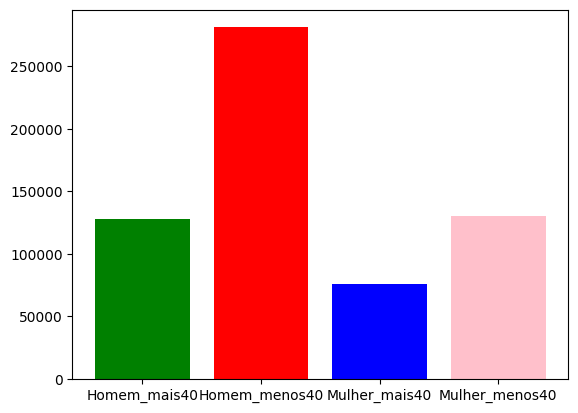

In [27]:
plt.bar(x,y,color=colors)

**Conclusão** : A hipótese foi **rejeitada em parte** , por um lado é inevitável concluir que as mulheres estão ganhando mais espaço político , pois tem mais candidatas mulheres com menos de 40 anos do que com mais . Mas a hipótese não pode ser considerada verdadeira pois os homens com menos de 40 anos também são a maioria .

#### 2 -Eixstem poucos candidatos que se autodeclararam indígenas com mais de 80 anos .

Minha ideia é fazer um agrupamento por kmeans para mostrar a idade agrupada das raças .

Para fazer o Kmeans precisa de apenas númericos , então irei recortar o dataframe 

In [6]:
df_k = df[['idade','raca']].copy()

In [8]:
df_k.head()

,idade,raca
0,33.0,branca
1,48.0,parda
2,46.0,parda
3,62.0,branca
4,48.0,parda


In [10]:
df_k['raca'].value_counts()

branca           296648
parda            240639
preta             65808
indigena           2527
amarela            2233
nao informado       119
Name: raca, dtype: int64

Não tem como usar kmeans para string , então irei usar uma designação 

branca -> 0

parda -> 1

preta -> 2

indigena -> 3

amarela -> 4

nao informado -> 5

In [13]:
df_k.loc[df_k['raca'] =='branca', 'Hipótese2'] = 0 
df_k.loc[df_k['raca'] =='parda', 'Hipótese2'] = 1
df_k.loc[df_k['raca'] =='preta', 'Hipótese2'] = 2 
df_k.loc[df_k['raca'] =='indigena', 'Hipótese2'] = 3 
df_k.loc[df_k['raca'] =='amarela', 'Hipótese2'] = 4
df_k.loc[df_k['raca'] =='nao informado', 'Hipótese2'] = 5  

In [17]:
df_k = df_k.drop(columns='raca')

In [21]:
df_k.isnull().values.any()

True

Vamos remover linhas que tiver NaN

In [22]:
df_k=df_k.dropna()

In [24]:
df_k.head()

,idade,Hipótese2
0,33.0,0.0
1,48.0,1.0
2,46.0,1.0
3,62.0,0.0
4,48.0,1.0


/home/yago/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


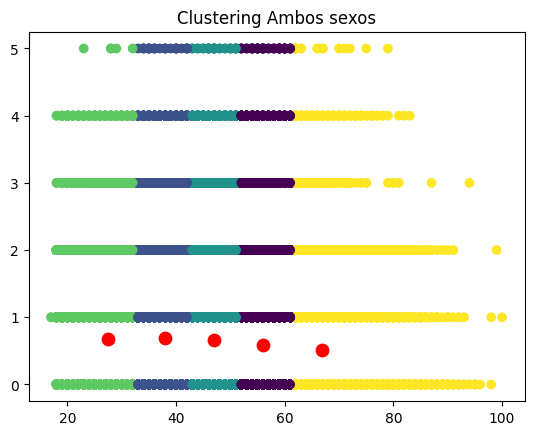

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_k)

plt.scatter(df_k['idade'], df_k['Hipótese2'], c=kmeans.labels_)
plt.title("Clustering Ambos sexos")
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'r')
plt.show() 

**Conclusão** : A hipótese foi aceita , uma vez que é visível graças ao agrupamento que forma após os 80 anos o agrupamento amarelo para o grupo 3 ddos indígenas passa a ser esparso , portanto referendamos a hipótese .

#### 3 - De 2018 para 2022 o número de candidatos que tem ensino superior completo aumentou

In [53]:
df.head()

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca,Hipótese1
0,2018,eleicao ordinaria,DF,NaN,NaN,105.0,1333015160,87699770400,70000612418,18007,...,33.0,feminino,ensino superior completo,divorciado(a),brasileira,RS,Porto Alegre,lizianebrauner@hotmailcom,branca,Menos40
1,2018,eleicao ordinaria,RR,NaN,NaN,270.0,32293593215,3011792682,230000605201,54300,...,48.0,masculino,ensino medio completo,casado(a),brasileira,PI,Inhuma,elivaldocruzrr@hotmailcom,parda,Mais40
2,2018,eleicao ordinaria,RR,NaN,NaN,537.0,32307209204,2718862631,230000615943,1888,...,46.0,masculino,ensino superior completo,casado(a),brasileira,PA,Belém,cirororaima@yahoocombr,parda,Mais40
3,2018,eleicao ordinaria,PR,NaN,NaN,713.0,32315457904,15458640647,160000629332,27115,...,62.0,feminino,ensino medio completo,casado(a),brasileira,PR,Colombo,olescoveaup2016@gmailcom,branca,Mais40
4,2018,eleicao ordinaria,RR,NaN,NaN,753.0,32317760230,1159942615,230000605200,54444,...,48.0,masculino,ensino fundamental completo,solteiro(a),brasileira,RR,Boa Vista,girdenitorreias65@outlookcom,parda,Mais40


In [62]:
df_3 = df.reset_index()
df_3.head()

,index,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,...,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca,Hipótese1
0,0,2018,eleicao ordinaria,DF,NaN,NaN,105.0,1333015160,87699770400,70000612418,...,33.0,feminino,ensino superior completo,divorciado(a),brasileira,RS,Porto Alegre,lizianebrauner@hotmailcom,branca,Menos40
1,1,2018,eleicao ordinaria,RR,NaN,NaN,270.0,32293593215,3011792682,230000605201,...,48.0,masculino,ensino medio completo,casado(a),brasileira,PI,Inhuma,elivaldocruzrr@hotmailcom,parda,Mais40
2,2,2018,eleicao ordinaria,RR,NaN,NaN,537.0,32307209204,2718862631,230000615943,...,46.0,masculino,ensino superior completo,casado(a),brasileira,PA,Belém,cirororaima@yahoocombr,parda,Mais40
3,3,2018,eleicao ordinaria,PR,NaN,NaN,713.0,32315457904,15458640647,160000629332,...,62.0,feminino,ensino medio completo,casado(a),brasileira,PR,Colombo,olescoveaup2016@gmailcom,branca,Mais40
4,4,2018,eleicao ordinaria,RR,NaN,NaN,753.0,32317760230,1159942615,230000605200,...,48.0,masculino,ensino fundamental completo,solteiro(a),brasileira,RR,Boa Vista,girdenitorreias65@outlookcom,parda,Mais40


<AxesSubplot: xlabel='ano', ylabel='index'>

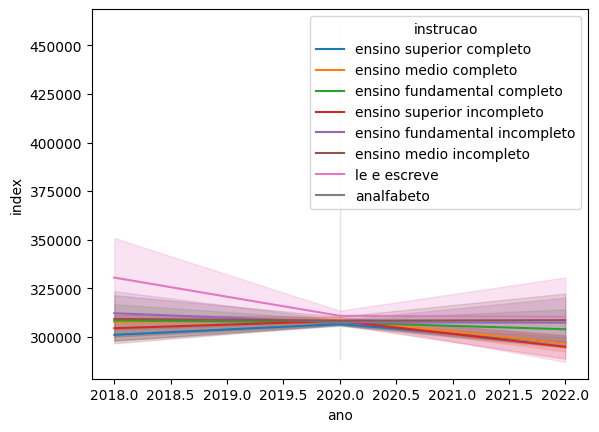

In [63]:
sns.lineplot(data=df_3,x='ano',y='index',hue='instrucao')

A visualização ficou muito ruim , então irei melhorar isso .

In [64]:
df_3['instrucao'].value_counts()

ensino medio completo            227917
ensino superior completo         165092
ensino fundamental incompleto     72793
ensino fundamental completo       70998
ensino superior incompleto        30259
ensino medio incompleto           29163
le e escreve                      18090
analfabeto                           15
Name: instrucao, dtype: int64

Para fins do trabalho , não me intressa se foi incompleto ou não a instrução do candidato

In [69]:
df_3= (df.loc[(df['instrucao']=='ensino medio completo') | (df['instrucao']=='ensino superior completo') | (df['instrucao']=='ensino fundamental completo')])

In [66]:
df_3 = df_3.reset_index()

<AxesSubplot: xlabel='ano', ylabel='index'>

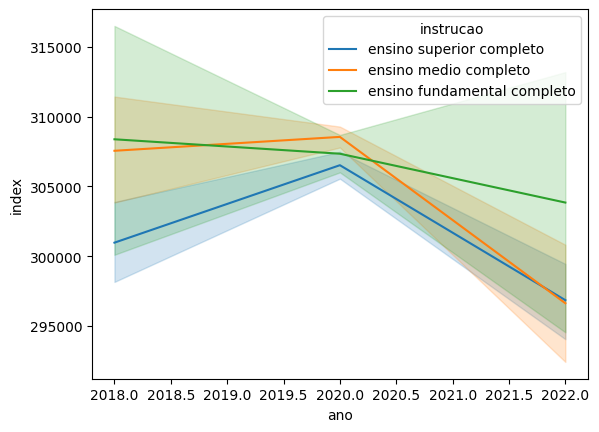

In [67]:
sns.lineplot(data=df_3,x='ano',y='index',hue='instrucao')

Temo outro problema : O número de candidatos das eleições de 2020 é muito maior do que as eleições para cargos não municipais .

In [72]:
df_3= (df_3.loc[(df_3['ano']==2018) | (df_3['ano']==2022) ])

In [75]:
df_3 = df_3.reset_index()

<AxesSubplot: xlabel='ano', ylabel='index'>

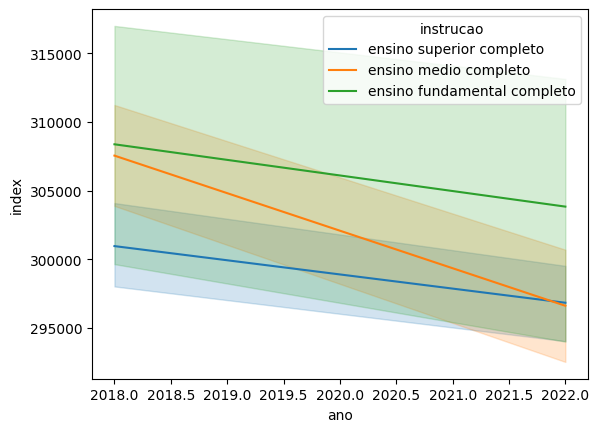

In [76]:
sns.lineplot(data=df_3,x='ano',y='index',hue='instrucao')

**Conclus]ao** : A hipótese por si só é **falsa** , porém vale salientar que ela não mede muita coisa . Pois não sabemos se o número de candidatos diminuiu drasticamente entre 2018 e 2022 então não dá para tirar conclusões concretas apenas em cima dessa gráfico .

#### 4 - De 2018 para 2022 houve um aumento no número de candidatos casados e uma diminuição nos solteiros .

In [29]:
df['estado_civil'].value_counts()

casado(a)        316004
solteiro(a)      225976
divorciado(a)     60601
viuvo(a)          11746
Name: estado_civil, dtype: int64

In [49]:
df_casado2018 = (df.loc[(df['estado_civil']=='casado(a)') & (df['ano']==2018) ])
df_solteiro2018 =  (df.loc[(df['estado_civil']=='solteiro(a)')&(df['ano']==2018) ])
df_casado2022 = (df.loc[(df['estado_civil']=='casado(a)') & (df['ano']==2022) ])
df_solteiro2022 =  (df.loc[(df['estado_civil']=='solteiro(a)')&(df['ano']==2022) ])
a = df_casado2018.shape[0]
b = df_casado2022.shape[0]
c = df_solteiro2018.shape[0]
d = df_solteiro2022.shape[0]

In [43]:
time = [i for i in range(df.shape[0])]
series = np.array(df['estado_civil'])
times = np.array(time)

In [45]:
fig = go.Figure()
obj1 = go.Scatter(
    x = [2018,2022],
    y = [a,b],
    mode = 'lines',
    name='Casado',
)
obj2 = go.Scatter(
      x = [2018,2022],
    y = [c,d],
    mode = 'lines',
    name='Solteiro',
)

fig.add_trace(obj1)
fig.add_trace(obj2)

fig.update_layout(title='Estado civil perante o tempo')
fig.show()

Não da para ver quase nada então irei normalizar,pelo método min e max , para poder ver os dois juntos

In [51]:

a_1 = (a-c)/(a-c)

b_1 = (b-c)/(a-c)

c_1 = (c-c)/(a-c)

d_1 = (d-c)/(a-c)

lista  = [a_1,b_1,c_1,d_1]
lista

[1.0, 0.9125037844383893, 0.0, 0.0036330608537693005]

In [52]:
fig = go.Figure()
obj1 = go.Scatter(
    x = [2018,2022],
    y = [a_1,b_1],
    mode = 'lines',
    name='Casado',
)
obj2 = go.Scatter(
      x = [2018,2022],
    y = [c_1,d_1],
    mode = 'lines',
    name='Solteiro',
)

fig.add_trace(obj1)
fig.add_trace(obj2)

fig.update_layout(title='Estado civil perante o tempo')
fig.show()

**Conclusão** : A hipótese é falsas , uma vez que teve uma redução no número de casados e um aumento no número de solteiro.

### Conclusão final : O dataset escolhido foi muito grande , ocupando quase 180MB , isso dificultou extremamente a análise , outros aspectos nos atributos como dados faltantes e do tipo string limitaram as visualizações possíveis nesse trabalho . Ademais , foi bem  gratificante implementar os aprendizados ocorrido durante todo o período de treinamento do PANDA . Um muito obrigado .